In [1]:
import sys
import scipy.stats as ss
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import pickle
import itertools
from tqdm import tqdm
import warnings
import networkx

# append path to gempy repository and import
sys.path.append("C:/Users/r02as18/git/gempy/")
import gempy as gp

from copy import deepcopy, copy

sys.path.append("C:/Users/r02as18/git/plothelper/")
import plothelper as ph

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
geo_data = gp.create_data([0,2000,0,2000,0,2000],
                          [50,50,50],
                          path_o = "../input_data/simple_fault_model_orientations.csv", # importing orientation (foliation) data
                          path_i = "../input_data/simple_fault_model_points.csv") # importing point-positional interface data

gp.set_series(geo_data, {"Fault_Series":'Main_Fault',
                         "Strat_Series": ('Sandstone_2','Siltstone', 'Shale', 'Sandstone_1')},
                          order_series = ["Fault_Series", 'Strat_Series'],
                          order_formations=['Main_Fault',
                                            'Sandstone_2','Siltstone', 'Shale', 'Sandstone_1'], verbose=0)

In [3]:
interp_data = gp.InterpolatorData(geo_data, u_grade=[1,1], output='geology', 
                                  compile_theano=True, theano_optimizer='fast_run')

# make copy of interp_data data for reset after stochastic modifcations
geo_data_res_stoch = deepcopy(interp_data.geo_data_res)

Compiling theano function...
Compilation Done!
Level of Optimization:  fast_run
Device:  cpu
Precision:  float32
Number of faults:  1


In [6]:
model_fw = pickle.load(open("simulations/2018-07-25_ABCrej_e0.p", "rb"))
model_abc = pickle.load(open("simulations/2018-07-25_forward.p", "rb"))

AttributeError: Can't get attribute 'ABCrej' on <module '__main__'>

In [14]:
model.keys()

dict_keys(['graphs', 'centroids', 'jaccards', 'lots', 'prior_samples', 'acc_ratio', 'gempy_data'])

In [7]:
model = model_fw

In [10]:
model_fw.keys()

dict_keys(['graphs', 'centroids', 'jaccards', 'lots', 'prior_samples', 'acc_ratio', 'gempy_data'])

AttributeError: 'dict' object has no attribute 'lbs'

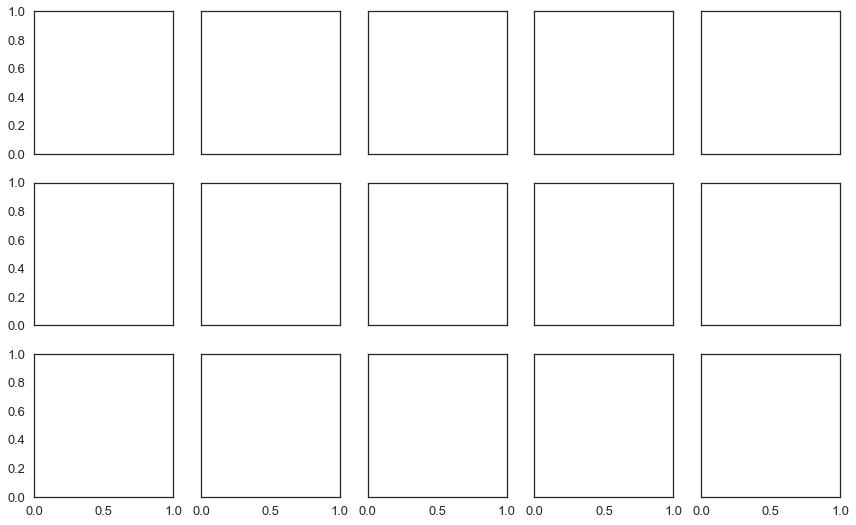

In [8]:
fig, axes = plt.subplots(ncols=5, nrows=3, figsize=ph.get_figsize(2), sharex=True, sharey=True)
nxkwargs = {"node_color": "black", "alpha": 0.5, "font_color": "white"}

np.random.seed(3) # 3
iters = np.random.choice(len(model.lbs), size=3*5)

for ax, i in zip(axes.flatten(), iters):
    
#     try:
#         ax.imshow(model.lbs[i][0].reshape(nx,nz).T, origin="lower", cmap=gp.plotting.colors.cmap, norm=gp.plotting.colors.norm)
#     except:
    ax.imshow(model.lbs[i][0].reshape(*geo_data.resolution)[:,12,:].T, origin="lower", cmap=gp.plotting.colors.cmap, norm=gp.plotting.colors.norm)
    networkx.draw_networkx(model.graphs[i], centroids_2d[i], ax=ax, **nxkwargs)
    
    ax.text(1,45, "Iter: {} ".format(i) + " J: {0:.2f}".format(model.jaccards[i]), color="#ffbcbc")
    
    #ax.set_xlim(0,49)
    #ax.set_ylim(0,49)

plt.tight_layout()